In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv('Transactions.csv')
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [6]:
print(df.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [7]:
df.duplicated().sum()

0

In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Date'] = df['TransactionDate'].dt.date
df['Time'] = df['TransactionDate'].dt.time
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Date,Time
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08-25,12:38:23
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05-27,22:23:54
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04-25,07:38:55
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03-26,22:55:37
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03-21,15:10:10
...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024-10-24,08:30:27
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024-06-04,02:15:24
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024-04-05,13:05:32
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024-09-29,10:16:02


In [9]:
df = df.drop('TransactionDate',axis=1)

## About data

In [11]:
# Most popular product
df['ProductID'].mode()

0    P059
Name: ProductID, dtype: object

In [12]:
# Cost
df.loc[df['ProductID'] == 'P059', 'Price'].unique()

array([303.2])

In [13]:
len(df['CustomerID'].unique())

199

In [14]:
len(df['ProductID'].unique())

100

## Spotting trends

In [16]:
trend = df.drop(columns = ['Time','CustomerID','ProductID','Time','Price'],axis=1)
trend = trend.sort_values(by = 'Date')

In [17]:
trend

,TransactionID,Quantity,TotalValue,Date
225,T00869,2,313.92,2023-12-30
32,T00605,4,958.80,2023-12-31
729,T00845,2,911.44,2023-12-31
822,T00154,4,1585.36,2023-12-31
868,T00909,2,319.20,2024-01-01
...,...,...,...,...
5,T00442,1,300.68,2024-12-26
539,T00698,1,261.20,2024-12-26
193,T00374,2,294.44,2024-12-27
390,T00951,2,458.12,2024-12-27


In [18]:
trend['Date'] = pd.to_datetime(trend['Date'])
trend['Month'] = trend['Date'].dt.month
print(trend)

    TransactionID  Quantity  TotalValue       Date  Month
225        T00869         2      313.92 2023-12-30     12
32         T00605         4      958.80 2023-12-31     12
729        T00845         2      911.44 2023-12-31     12
822        T00154         4     1585.36 2023-12-31     12
868        T00909         2      319.20 2024-01-01      1
..            ...       ...         ...        ...    ...
5          T00442         1      300.68 2024-12-26     12
539        T00698         1      261.20 2024-12-26     12
193        T00374         2      294.44 2024-12-27     12
390        T00951         2      458.12 2024-12-27     12
638        T00333         3      476.79 2024-12-28     12

[1000 rows x 5 columns]


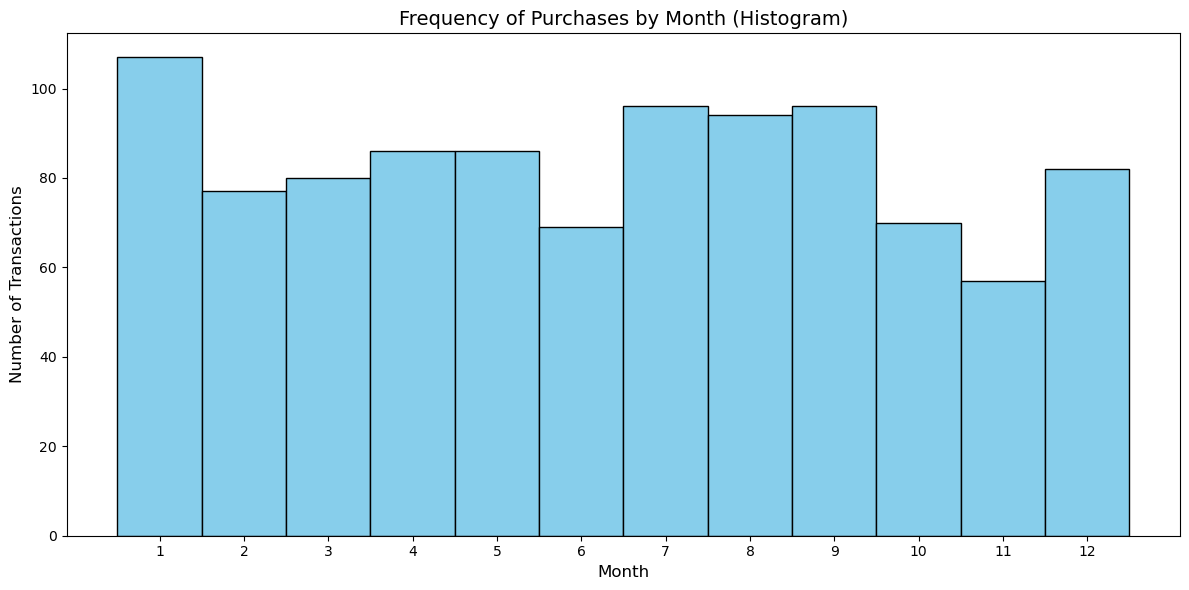

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(trend['Month'], bins=range(1, 14), color='skyblue', edgecolor='black', align='mid')
plt.title('Frequency of Purchases by Month (Histogram)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
bin_centers = [i + 0.5 for i in range(1, 13)]
plt.xticks(ticks=bin_centers, labels=range(1, 13))
plt.tight_layout()
plt.show()

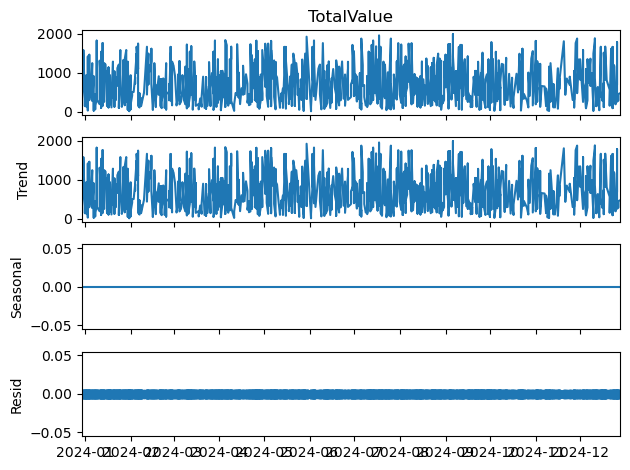

In [20]:
value = trend
value.set_index('Date', inplace=True)

result = seasonal_decompose(trend['TotalValue'], model='additive', period=1)

result.plot()
plt.tight_layout()
plt.show()

In [21]:
# There is no visible trends or seasonality

## Customer Purchasing

In [23]:
len(df['CustomerID'].unique())

199

In [24]:
cust = pd.DataFrame(df.groupby('CustomerID')['TotalValue'].mean())

In [25]:
cust

,TotalValue
CustomerID,
C0001,670.904000
C0002,465.685000
C0003,681.345000
C0004,669.360000
C0005,678.080000
...,...
C0196,1245.720000
C0197,642.883333
C0198,465.915000


In [26]:
cust = cust.sort_values(by = 'TotalValue')

In [27]:
cust.iloc[-1,0:2]

TotalValue    1323.133333
Name: C0040, dtype: float64

In [28]:
df

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Date,Time
0,T00001,C0199,P067,1,300.68,300.68,2024-08-25,12:38:23
1,T00112,C0146,P067,1,300.68,300.68,2024-05-27,22:23:54
2,T00166,C0127,P067,1,300.68,300.68,2024-04-25,07:38:55
3,T00272,C0087,P067,2,601.36,300.68,2024-03-26,22:55:37
4,T00363,C0070,P067,3,902.04,300.68,2024-03-21,15:10:10
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,1,459.86,459.86,2024-10-24,08:30:27
996,T00759,C0059,P037,3,1379.58,459.86,2024-06-04,02:15:24
997,T00922,C0018,P037,4,1839.44,459.86,2024-04-05,13:05:32
998,T00959,C0115,P037,2,919.72,459.86,2024-09-29,10:16:02


In [29]:
df.groupby('Quantity')['Price'].mean()

Quantity
1    273.983389
2    272.893780
3    273.664921
4    269.843985
Name: Price, dtype: float64

In [30]:
# In average customers would spend around 265 - 275 for a product